In [1]:
# @title Data retrieval
import os, requests

fname = 'memory_nback.npz'
url = "https://osf.io/xfc7e/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [2]:
import math
from scipy import signal

In [3]:
# @title Install packages (`nilearn`, `nimare`, `duecredit`), import `matplotlib` and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet
!pip install duecredit --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
# @title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat_11 = alldat[1][1]

print(dat_11.keys())

dict_keys(['V', 't_off', 'locs', 'srate', 'scale_uv', 't_on', 'target', 'stim_id', 'response', 'rt', 'expinfo', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


In [5]:
dat_filt = alldat[1][1]
V_ = dat_filt['V'].astype('float32') # always convert the voltage data to float32!

# bandpass filter between 4 and 8 Hz
b, a = signal.butter(3, [4,8], btype='bandpass', fs=1000)
V_filt = signal.filtfilt(b, a, V_[:,1], 0)

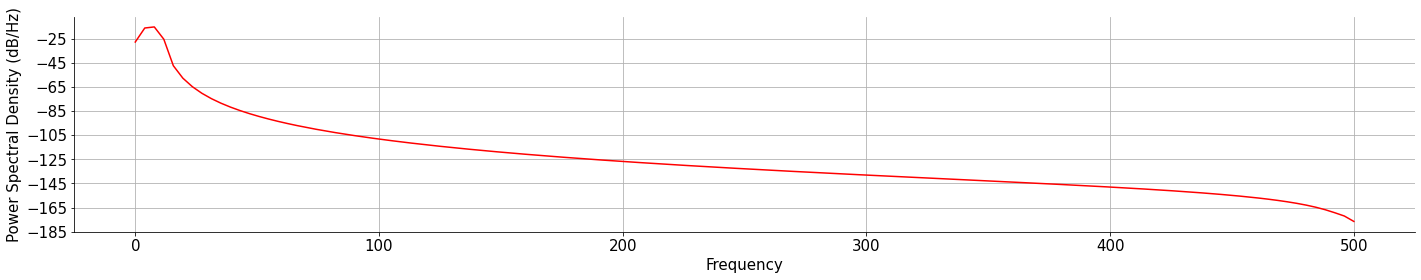

In [6]:
psd=plt.psd(V_filt,Fs=1000,color='r')

In [ ]:
psd_11 = []
dat_filt = alldat[1][1]
V_ = dat_filt['V'].astype('float32')
b, a = signal.butter(3, [4,8], btype='bandpass', fs=1000)

# bandpass filter between 4 and 8 Hz

V_filt = signal.filtfilt(b, a, V_[:,1], 0)
